In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


%matplotlib inline

In [2]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [38]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder

In [39]:
df = pd.read_csv('cut_dns.csv').dropna()

In [40]:
encoder = LabelEncoder()
train_descrs = df["description"][::8]
test_descrs = df["description"][1::8]
train_cats = encoder.fit_transform(df["category_id"][::8])
test_cats = encoder.transform(df["category_id"][1::8])

In [43]:
count_vec = CountVectorizer(max_features=30)
count_train_vecs = count_vec.fit_transform(train_descrs)
count_test_vecs = count_vec.transform(test_descrs)
count_train_vecs

<2042x30 sparse matrix of type '<class 'numpy.int64'>'
	with 5972 stored elements in Compressed Sparse Row format>

In [44]:
tsne = TSNE()

In [45]:
components = tsne.fit_transform(count_train_vecs.toarray())

In [46]:
components

array([[ -6.1111646,  11.3485775],
       [ 20.02509  ,  -5.453775 ],
       [ -3.9497097, -27.486624 ],
       ...,
       [ -2.5232267,   8.476689 ],
       [ -1.6053488,  18.670126 ],
       [ -6.1213956,  11.364528 ]], dtype=float32)

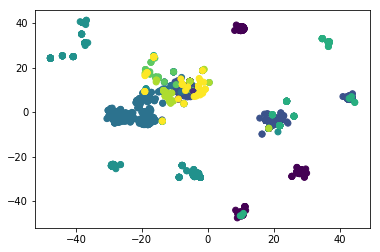

In [47]:
plt.scatter(x=components[:,0], y=components[:,1], c=train_cats)